In [2]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

In [3]:
bmy = yf.Ticker("BMY")
bmy_data = bmy.history(interval="1d", period="10y")
stock_df = pd.DataFrame(bmy_data)
stock_df.insert(0, 'stock_name', 'BMY')

In [4]:
stock_df

,stock_name,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,,
2011-03-07,BMY,19.394296,19.453022,19.232800,19.313547,33765100,0.0,0
2011-03-08,BMY,19.364932,19.475045,19.254821,19.416319,13386200,0.0,0
2011-03-09,BMY,19.342911,19.416319,19.269503,19.342911,8473000,0.0,0
2011-03-10,BMY,19.262160,19.372271,19.181411,19.276842,9851900,0.0,0
2011-03-11,BMY,19.218112,19.401631,19.181408,19.386950,9145900,0.0,0
...,...,...,...,...,...,...,...,...
2021-03-01,BMY,61.900002,62.070000,61.520000,61.630001,7321400,0.0,0
2021-03-02,BMY,61.950001,62.180000,61.209999,61.270000,9582700,0.0,0
2021-03-03,BMY,61.049999,61.349998,59.970001,60.750000,13598200,0.0,0


In [11]:
stock_df.reset_index(inplace=True)

In [8]:
stock_df.rename(columns={"Date":"date", 
                         "Open": "open", 
                         "High": "high",
                         "Low": "low",
                         "Close": "close", 
                         "Volume": "volume",}, inplace=True)

In [12]:
stock_df.describe()

,index,open,high,low,close,volume,Dividends,Stock Splits
count,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2.517000e+03,2517.000000,2517.0
mean,1258.000000,45.641492,46.082898,45.198501,45.642951,1.003894e+07,0.006071,0.0
std,726.739637,12.794709,12.933628,12.640093,12.775423,7.227337e+06,0.048016,0.0
min,0.000000,18.520737,18.740961,18.329885,18.329885,1.385100e+06,0.000000,0.0
25%,629.000000,37.705208,38.087296,37.249689,37.732914,6.146300e+06,0.000000,0.0
50%,1258.000000,48.520455,49.059690,48.111076,48.570854,8.443700e+06,0.000000,0.0
75%,1887.000000,56.047768,56.564217,55.490033,56.105568,1.199530e+07,0.000000,0.0
max,2516.000000,67.548674,67.557436,66.830353,67.250832,1.854132e+08,0.490000,0.0


In [13]:
stock_df.reset_index(inplace=True)

In [14]:
stock_df['date'] = pd.to_datetime(stock_df['date'])

In [19]:
import numpy as np
from fbprophet import Prophet

In [22]:
features = stock_df[['date','close']]
features = features.rename(columns={'date':'ds', 'close':'y'})
features.head(5)

,ds,y
0,2011-03-07,19.313547
1,2011-03-08,19.416319
2,2011-03-09,19.342911
3,2011-03-10,19.276842
4,2011-03-11,19.386950


In [24]:
m = Prophet(daily_seasonality = True) # the Prophet class (model)
m.fit(features) # fit the model using all data

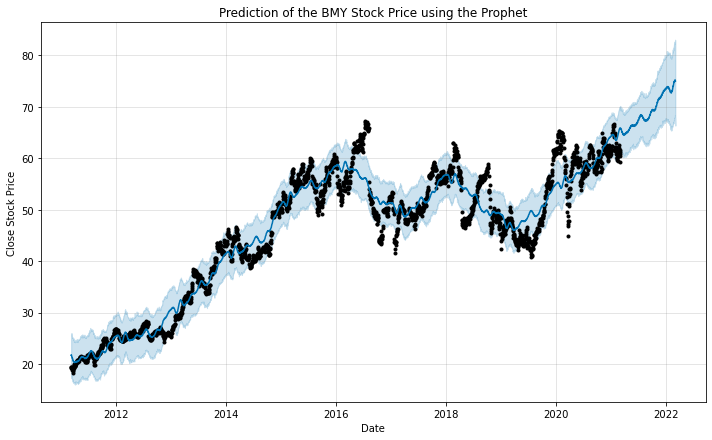

In [26]:
future = m.make_future_dataframe(periods=365) #we need to specify the number of days in future
prediction = m.predict(future)
m.plot(prediction)
plt.title("Prediction of the BMY Stock Price using the Prophet")
plt.xlabel("Date")
plt.ylabel("Close Stock Price")
plt.show()

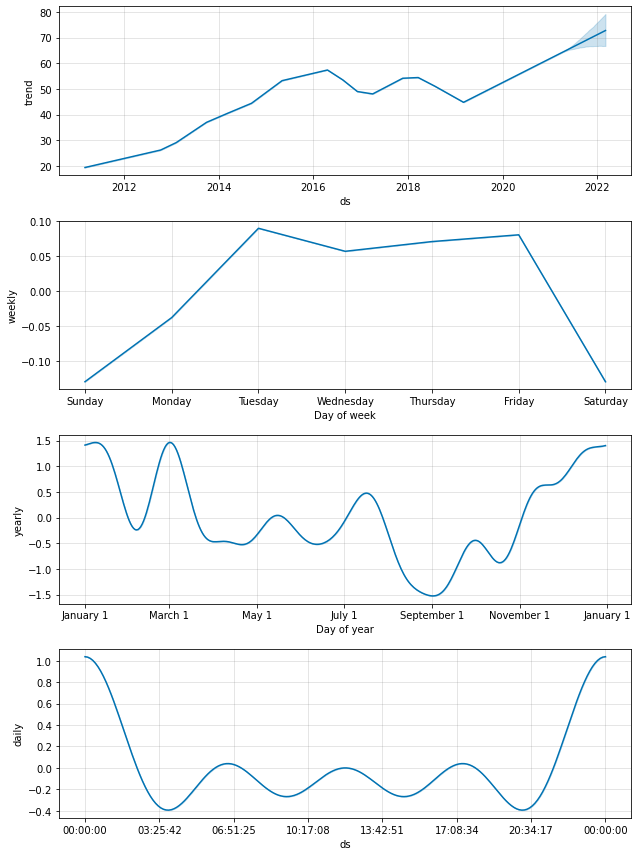

In [27]:
m.plot_components(prediction)
plt.show()